In [75]:
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import KFold
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import Callback
import joblib

In [50]:
df = pd.read_csv('dataset/Crop_recommendation.csv')
print(df)

        N   P   K  temperature   humidity        ph    rainfall   label
0      90  42  43    20.879744  82.002744  6.502985  202.935536    rice
1      85  58  41    21.770462  80.319644  7.038096  226.655537    rice
2      60  55  44    23.004459  82.320763  7.840207  263.964248    rice
3      74  35  40    26.491096  80.158363  6.980401  242.864034    rice
4      78  42  42    20.130175  81.604873  7.628473  262.717340    rice
...   ...  ..  ..          ...        ...       ...         ...     ...
2195  107  34  32    26.774637  66.413269  6.780064  177.774507  coffee
2196   99  15  27    27.417112  56.636362  6.086922  127.924610  coffee
2197  118  33  30    24.131797  67.225123  6.362608  173.322839  coffee
2198  117  32  34    26.272418  52.127394  6.758793  127.175293  coffee
2199  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee

[2200 rows x 8 columns]


In [51]:
X = df.drop(columns=['rainfall','label'])
print(X)
Y = df['label']
print(Y)

        N   P   K  temperature   humidity        ph
0      90  42  43    20.879744  82.002744  6.502985
1      85  58  41    21.770462  80.319644  7.038096
2      60  55  44    23.004459  82.320763  7.840207
3      74  35  40    26.491096  80.158363  6.980401
4      78  42  42    20.130175  81.604873  7.628473
...   ...  ..  ..          ...        ...       ...
2195  107  34  32    26.774637  66.413269  6.780064
2196   99  15  27    27.417112  56.636362  6.086922
2197  118  33  30    24.131797  67.225123  6.362608
2198  117  32  34    26.272418  52.127394  6.758793
2199  104  18  30    23.603016  60.396475  6.779833

[2200 rows x 6 columns]
0         rice
1         rice
2         rice
3         rice
4         rice
         ...  
2195    coffee
2196    coffee
2197    coffee
2198    coffee
2199    coffee
Name: label, Length: 2200, dtype: object


In [52]:
label_encoder = LabelEncoder()
Y = label_encoder.fit_transform(Y)

In [53]:
# Menstandarisasi fitur
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [54]:
# Inisialisasi KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Iterate melalui setiap fold
for fold, (train_index, val_index) in enumerate(kf.split(X)):
    print(f'Fold {fold+1}')
    x_train, x_val = X[train_index], X[val_index]
    y_train, y_val = Y[train_index], Y[val_index]

Fold 1
Fold 2
Fold 3
Fold 4
Fold 5


In [55]:
model =  tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(x_train.shape[1],)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    # tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='relu'),
    # tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(len(np.unique(Y)), activation='softmax')
])

In [56]:
# Kompilasi model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 128)               896       
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_9 (Dense)             (None, 64)                8256      
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dense_11 (Dense)            (None, 22)                726       
                                                                 
Total params: 11958 (46.71 KB)
Trainable params: 11958 (46.71 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [57]:
# Definisi Callback
class CustomCallback(Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs.get('accuracy') >= 0.92 and logs.get('val_accuracy') >= 0.96:
            print("\nTraining accuracy reached 92% and validation accuracy reached 96%. Stopping training.")
            self.model.stop_training = True

In [58]:
# Inisiasi Callback
callbacks = CustomCallback()

In [59]:
# Melatih model
history = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_val, y_val))

Epoch 1/50
55/55 [==============================] - 1s 6ms/step - loss: 2.8198 - accuracy: 0.2222 - val_loss: 2.4385 - val_accuracy: 0.3386
Epoch 2/50
55/55 [==============================] - 0s 4ms/step - loss: 1.8805 - accuracy: 0.4551 - val_loss: 1.3715 - val_accuracy: 0.6045
Epoch 3/50
55/55 [==============================] - 0s 2ms/step - loss: 1.0223 - accuracy: 0.6864 - val_loss: 0.7370 - val_accuracy: 0.7614
Epoch 4/50
55/55 [==============================] - 0s 3ms/step - loss: 0.6564 - accuracy: 0.7949 - val_loss: 0.5342 - val_accuracy: 0.8409
Epoch 5/50
55/55 [==============================] - 0s 2ms/step - loss: 0.4846 - accuracy: 0.8472 - val_loss: 0.4175 - val_accuracy: 0.8636
Epoch 6/50
55/55 [==============================] - 0s 2ms/step - loss: 0.4026 - accuracy: 0.8568 - val_loss: 0.3615 - val_accuracy: 0.8614
Epoch 7/50
55/55 [==============================] - 0s 2ms/step - loss: 0.3633 - accuracy: 0.8716 - val_loss: 0.3148 - val_accuracy: 0.8818
Epoch 8/50
55/55 [==

In [60]:
loss, accuracy = model.evaluate(x_val, y_val)
print(f'Validation Accuracy: {accuracy}')

14/14 [==============================] - 0s 1ms/step - loss: 0.1254 - accuracy: 0.9386
Validation Accuracy: 0.9386363625526428


In [61]:
# Mendapatkan riwayat akurasi pelatihan
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
# Mendapatkan riwayat loss pelatihan
loss = history.history['loss']
val_loss = history.history['val_loss']

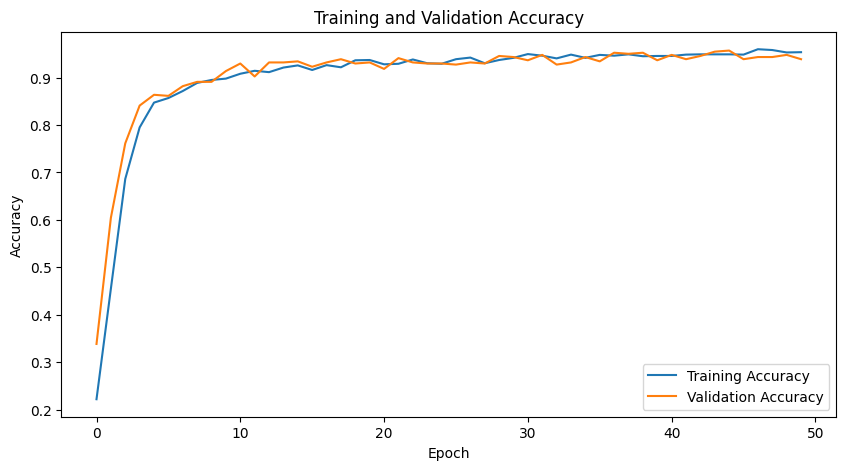

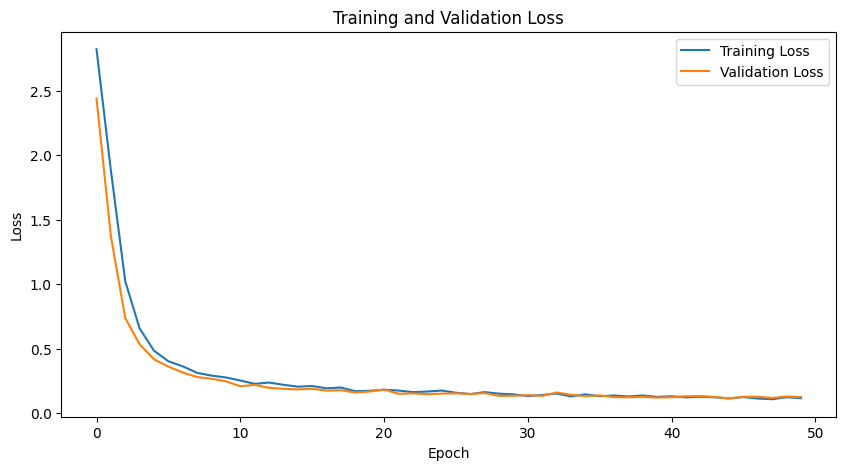

In [62]:
# Plot akurasi
plt.figure(figsize=(10, 5))
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.figure(figsize=(10, 5))
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [76]:
model.save('soilsensor.h5')
joblib.dump(label_encoder, 'label_encoder.joblib')
joblib.dump(scaler, 'scaler.joblib')

c:\Users\USER\anaconda3\envs\main-ds\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


['scaler.joblib']

In [64]:
# Load the trained model
model = tf.keras.models.load_model('soilsensor.h5')

# Convert the model to TensorFlow Lite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the converted model to a file
with open('converted_model.tflite', 'wb') as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\USER\AppData\Local\Temp\tmpf8gd3cg5\assets


INFO:tensorflow:Assets written to: C:\Users\USER\AppData\Local\Temp\tmpf8gd3cg5\assets


In [65]:
# N = 0 - 140
# P = 5 - 145
# K = 5 - 205
# temp = 8 - 43
# hum = 14 - 100
# ph = 3 - 10

N = 21
P = 22
K = 25
temp = 30
hum = 40
ph = 6

#Input parameter untuk prediksi
pred_params = [N, P, K, temp, hum, ph]



c:\Users\USER\anaconda3\envs\main-ds\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [84]:
#Prediksi dengan load TFLite
# Load the TFLite model
with open('converted_model.tflite', 'rb') as f:
    tflite_model = f.read()

# Memuat StandardScaler dan LabelEncoder yang telah disimpan
scaler = joblib.load('scaler.joblib')
label_encoder = joblib.load('label_encoder.joblib')

# Initialize the interpreter
interpreter = tf.lite.Interpreter(model_content=tflite_model)
interpreter.allocate_tensors()

# Get input and output tensors
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Menstandarisasi input
input_data = np.array([pred_params])
input_data_scaled = scaler.transform(input_data).astype(np.float32)

# Set the tensor to point to the input data to be inferred
interpreter.set_tensor(input_details[0]['index'], input_data_scaled)

# Run inference
interpreter.invoke()

# Extract the output tensor
output_data = interpreter.get_tensor(output_details[0]['index'])
predicted_label = label_encoder.inverse_transform(np.argmax(output_data, axis=1))
print(f"Tanaman yang direkomendasikan berdasarkan parameter yang dimasukkan adalah: {predicted_class[0]}")


Tanaman yang direkomendasikan berdasarkan parameter yang dimasukkan adalah: mango


c:\Users\USER\anaconda3\envs\main-ds\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [72]:
# Memperoleh prediksi
prediction = model.predict(input_data_scaled)
print(prediction)
predicted_class = label_encoder.inverse_transform(np.argmax(prediction, axis=1))
print(f"Tanaman yang direkomendasikan berdasarkan parameter yang dimasukkan adalah: {predicted_class[0]}")

1/1 [==============================] - 0s 69ms/step
[[9.95963813e-25 1.13755368e-29 3.55815799e-19 4.06748203e-12
  4.40249717e-19 5.63523713e-07 3.48222988e-23 8.35183552e-17
  1.50228895e-15 5.31381517e-09 4.62947247e-17 1.60257196e-10
  9.99992251e-01 7.15319129e-06 2.25343170e-30 2.91813269e-26
  3.17612100e-19 6.14021349e-26 2.78122664e-11 1.55230054e-17
  1.18320446e-26 1.11618878e-16]]
Tanaman yang direkomendasikan berdasarkan parameter yang dimasukkan adalah: mango


# Jika ada dataset baru

In [67]:
# # Compile the model
# model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# # Train the model on the new dataset
# model.fit(new_X_train, new_Y_train, epochs=5, validation_data=(validation_X, validation_Y))

# # Save the updated model
# model.save('updated_model.h5')

# # Load the trained model
# model = tf.keras.models.load_model('updated_model.h5')

# # Convert the model to TensorFlow Lite format
# converter = tf.lite.TFLiteConverter.from_keras_model(model)
# tflite_model = converter.convert()

# # Save the converted model to a file
# with open('converted_model.tflite', 'wb') as f:
#     f.write(tflite_model)